# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
gorjetas = sns.load_dataset("tips")
gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
gorjetas['tip_pct'] = gorjetas['tip'] / (gorjetas['total_bill'] - gorjetas['tip'])
gorjetas['net_bill'] = gorjetas['total_bill'] - gorjetas['tip']
gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        19:15:20   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

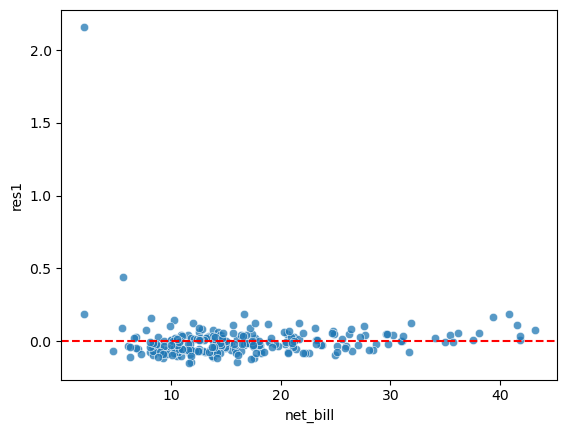

In [4]:
modelo1 = smf.ols('tip_pct ~ net_bill', data = gorjetas).fit()
print(modelo1.summary())
gorjetas['res1'] = modelo1.resid

sns.scatterplot(x = 'net_bill', y = 'res1', data = gorjetas, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

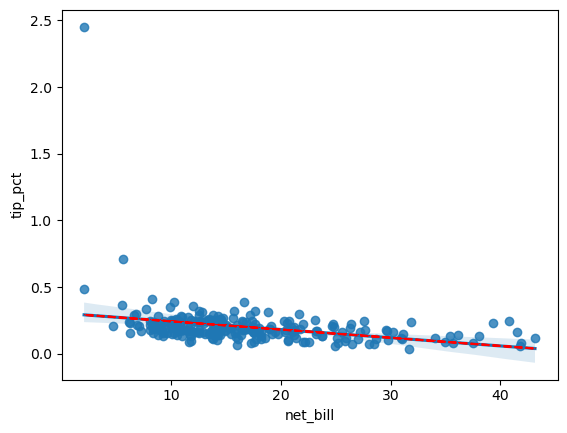

In [5]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = gorjetas)
plt.plot(gorjetas['net_bill'], modelo1.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.62e-13
Time:                        19:15:21   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

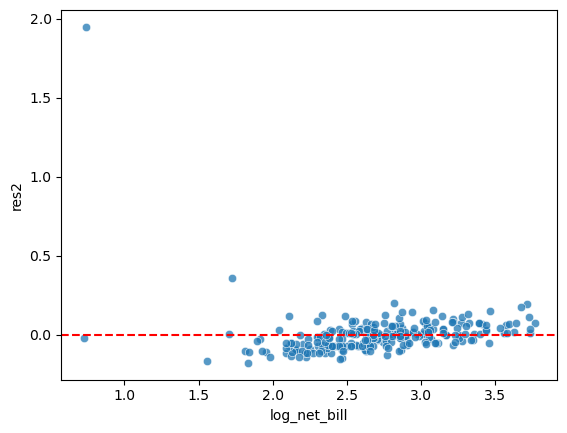

In [6]:
gorjetas['log_net_bill'] = np.log(gorjetas['net_bill'])
modelo2 = smf.ols('tip_pct ~ log_net_bill', data=gorjetas).fit()
print(modelo2.summary())
gorjetas['res2'] = modelo2.resid

sns.scatterplot(x = 'log_net_bill', y = 'res2', data = gorjetas, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

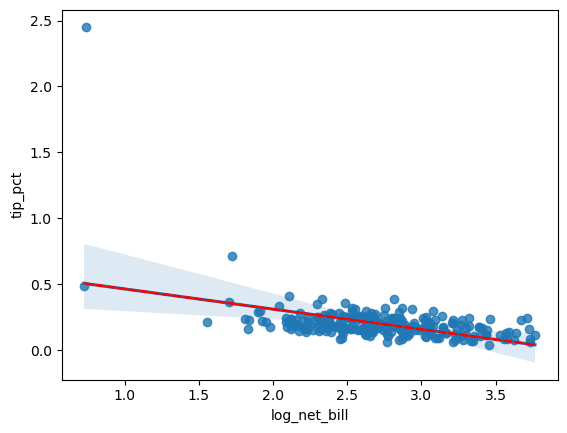

In [7]:
sns.regplot(x = 'log_net_bill', y = 'tip_pct', data = gorjetas)
plt.plot(gorjetas['log_net_bill'], modelo2.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.06e-09
Time:                        19:15:22   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

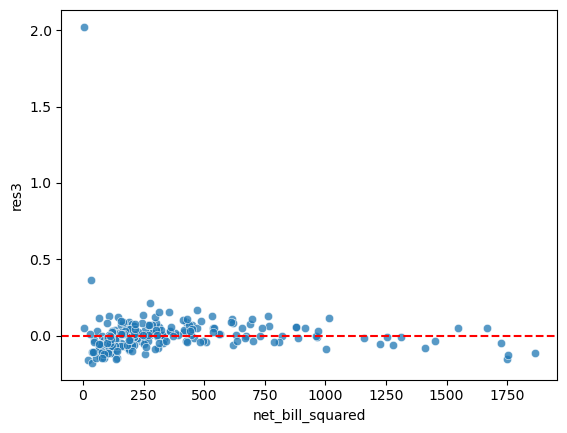

In [8]:
gorjetas['net_bill_squared'] = gorjetas['net_bill'] ** 2
modelo3 = smf.ols('tip_pct ~ net_bill + net_bill_squared', data=gorjetas).fit()
print(modelo3.summary())
gorjetas['res3'] = modelo3.resid

sns.scatterplot(x = 'net_bill_squared', y = 'res3', data = gorjetas, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

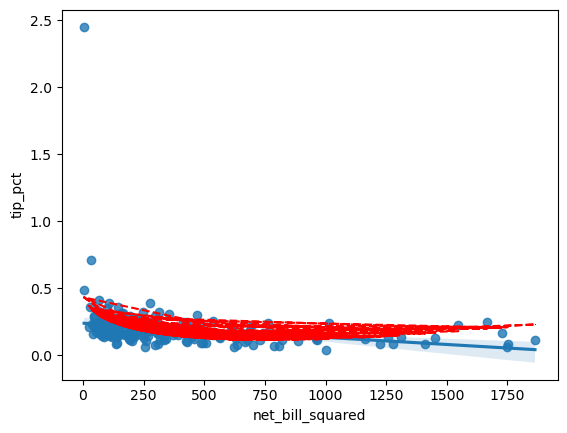

In [9]:
sns.regplot(x = 'net_bill_squared', y = 'tip_pct', data = gorjetas)
plt.plot(gorjetas['net_bill_squared'], modelo3.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        19:15:23   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

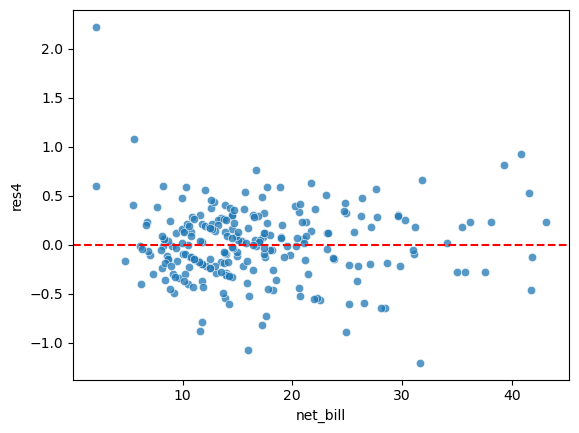

In [10]:
gorjetas['log_tip_pct'] = np.log(gorjetas['tip_pct'])
modelo4 = smf.ols('log_tip_pct ~ net_bill', data=gorjetas).fit()
print(modelo4.summary())
gorjetas['res4'] = modelo4.resid

sns.scatterplot(x = 'net_bill', y = 'res4', data = gorjetas, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

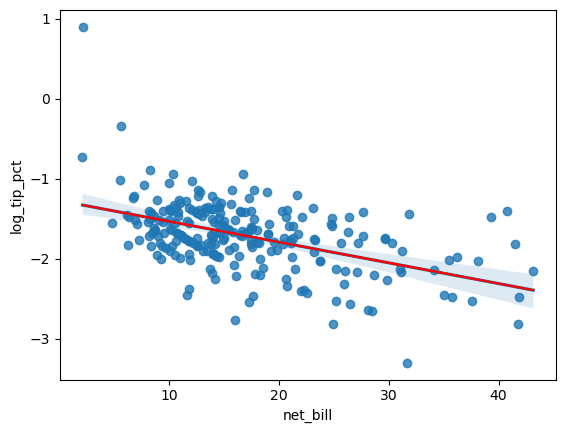

In [11]:
sns.regplot(x = 'net_bill', y = 'log_tip_pct', data = gorjetas)
plt.plot(gorjetas['net_bill'], modelo4.fittedvalues, 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        19:15:24   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

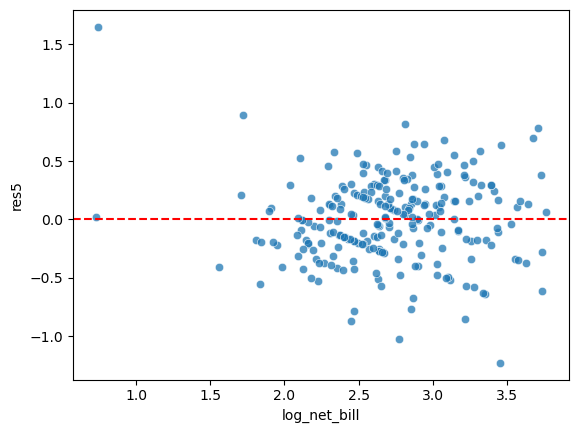

In [12]:
modelo5 = smf.ols('log_tip_pct ~ log_net_bill', data=gorjetas).fit()
print(modelo5.summary())
gorjetas['res5'] = modelo5.resid

sns.scatterplot(x = 'log_net_bill', y = 'res5', data = gorjetas, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

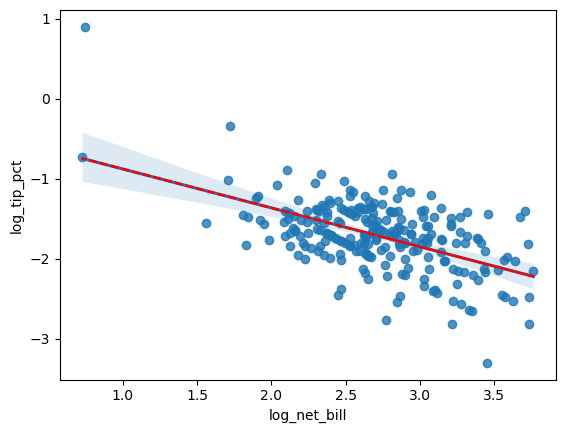

In [13]:
sns.regplot(x = 'log_net_bill', y = 'log_tip_pct', data = gorjetas)
plt.plot(gorjetas['log_net_bill'], modelo5.fittedvalues, 'r,--')

###  6. qual modelo resultou no melhor ajuste?

In [14]:
r2_modelo1 = modelo1.rsquared
r2_modelo2 = modelo2.rsquared
r2_modelo3 = modelo3.rsquared
r2_modelo4 = modelo4.rsquared
r2_modelo5 = modelo5.rsquared

In [15]:
print("R^2 dos modelos:")
print(f"Modelo 1 (res1 ~ net_bill): {r2_modelo1:.3f}")
print(f"Modelo 2 (res2 ~ log(net_bill)): {r2_modelo2:.3f}")
print(f"Modelo 3 (res3 ~ net_bill + net_bill^2): {r2_modelo3:.3f}")
print(f"Modelo 4 (res4 ~ net_bill): {r2_modelo4:.3f}")
print(f"Modelo 5 (res5 ~ log(net_bill)): {r2_modelo5:.3f}")

R^2 dos modelos:
Modelo 1 (res1 ~ net_bill): 0.091
Modelo 2 (res2 ~ log(net_bill)): 0.202
Modelo 3 (res3 ~ net_bill + net_bill^2): 0.158
Modelo 4 (res4 ~ net_bill): 0.235
Modelo 5 (res5 ~ log(net_bill)): 0.293


In [16]:
melhor_modelo = max([(r2_modelo1, 'Modelo 1'), (r2_modelo2, 'Modelo 2'), (r2_modelo3, 'Modelo 3'), (r2_modelo4, 'Modelo 4'), (r2_modelo5, 'Modelo 5')], key=lambda x: x[0])
print(f"\nO melhor modelo é: {melhor_modelo[1]} com R² = {melhor_modelo[0]:.3f}")


O melhor modelo é: Modelo 5 com R² = 0.293
